<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/DL/3_0_%D0%9F%D0%B5%D1%80%D0%B5%D1%85%D0%BE%D0%B4_%D0%BE%D1%82_%D0%B0%D0%B2%D1%82%D0%BE%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B8_%D0%BA_%D1%80%D0%B5%D0%BA%D1%83%D1%80%D1%80%D0%B5%D0%BD%D1%82%D0%BD%D0%BE%D0%B9_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%BE%D0%B9_%D1%81%D0%B5%D1%82%D0%B8_(RNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Переход от авторегрессии к рекуррентной нейронной сети (RNN)

## 1. Введение

Нейронные сети можно рассматривать как ансамбль регрессионных моделей, где каждая модель формирует предсказание на основе ранее полученных данных. Линейная регрессия представляется следующим уравнением:

$$
y_i = b + w \cdot x_i,
$$

где $y_i$ — целевая переменная, $b$ — смещение (bias), $w$ — весовой коэффициент, а $x_i$ — входные данные.

Для перехода от линейной регрессии к нейронной модели вводим скрытое состояние и применяем к нему функцию активации:

$$
\begin{aligned}
    h_i &= b_h + w \cdot x_i, \\
    y_i &= f(h_i),
\end{aligned}
$$

где $h_i$ — скрытое состояние, а $f$ — функция активации.

## 2. Авторегрессия

Авторегрессия представляет собой простейшую линейную модель для работы с временными рядами. В этой модели текущее значение ряда объясняется через предыдущее:

$$
y_t = b + w \cdot y_{t-1}.
$$

Данная модель может быть визуализирована следующими средствами:



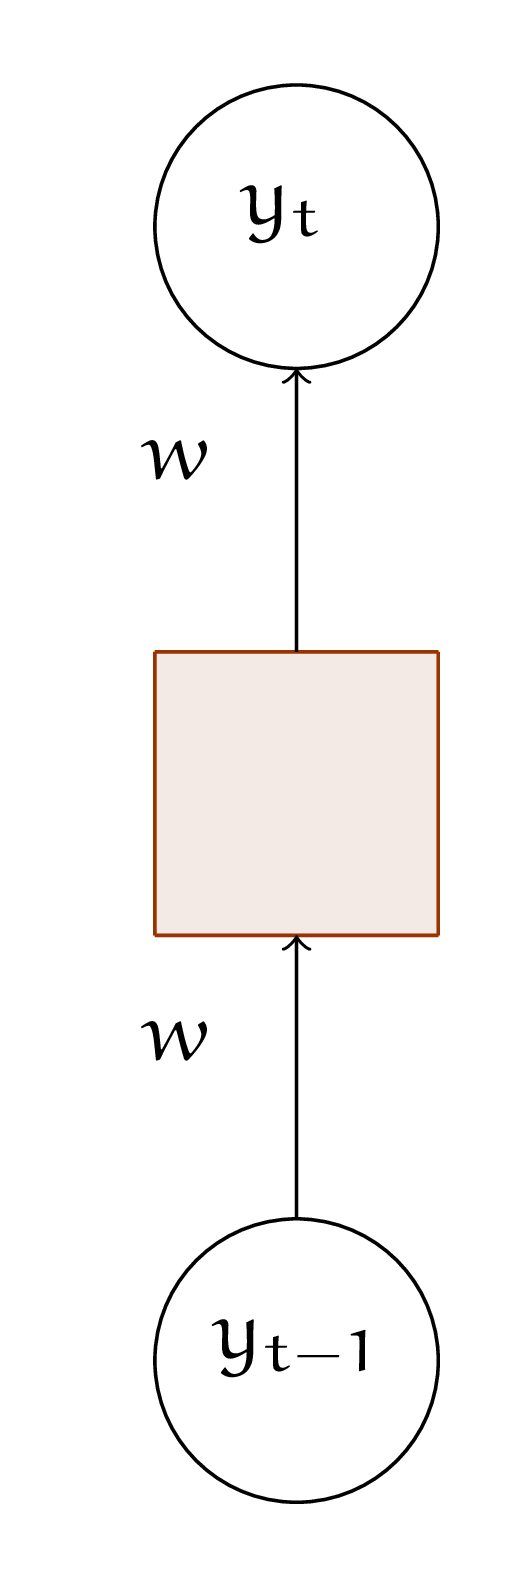



Чтобы перейти от авторегрессии к рекуррентному нейрону, мы можем использовать аналогичный подход, как это было сделано с линейной моделью. Рекуррентный нейрон может быть представлен следующим образом:



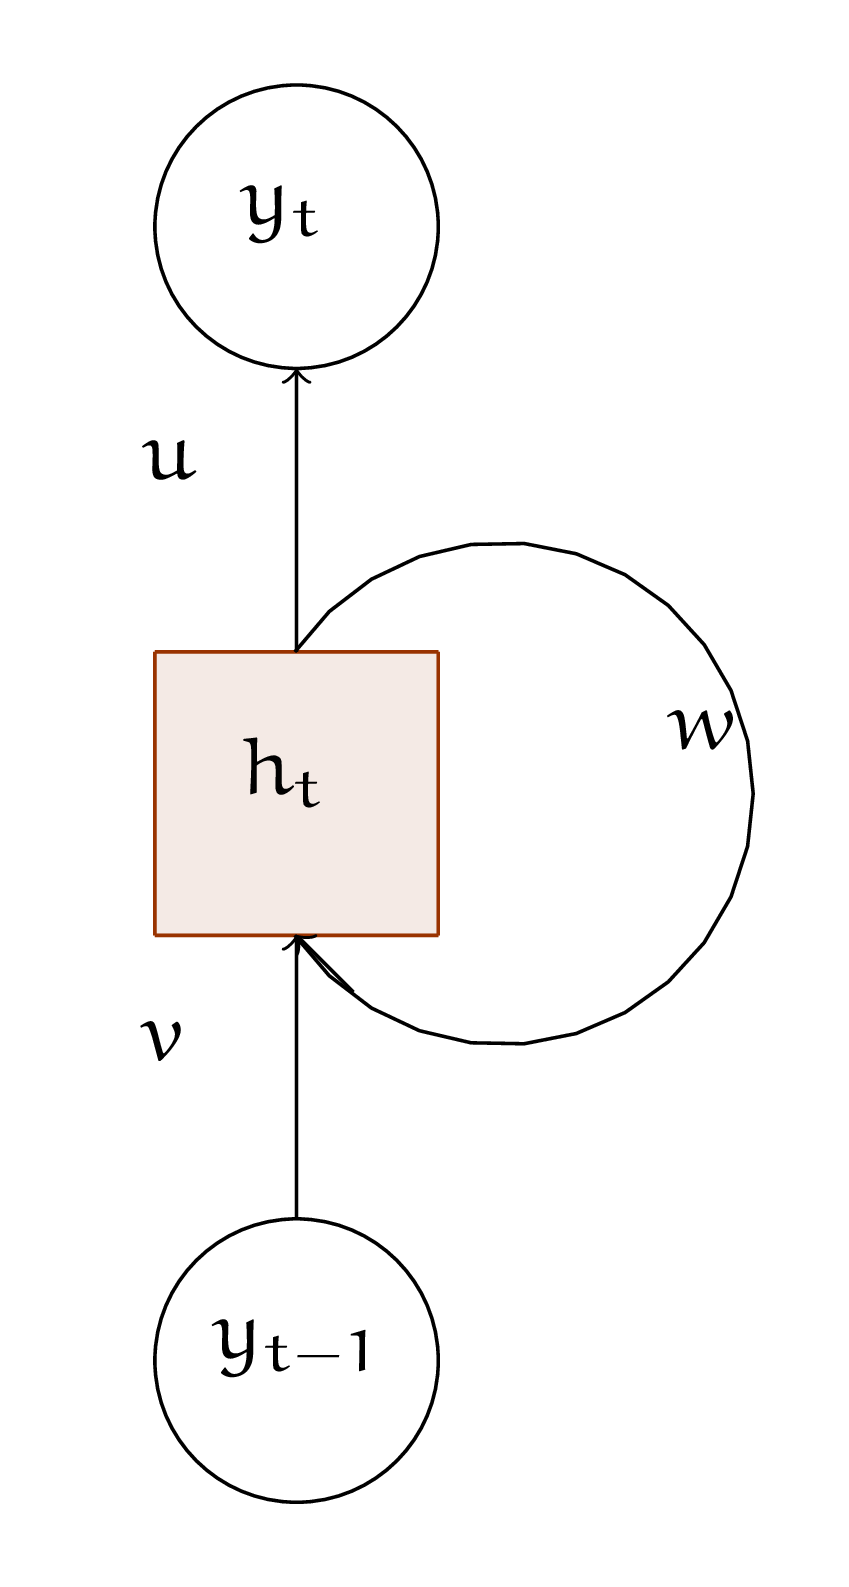


Теперь выпишем уравнения, описывающие рекуррентный нейрон. В представленных уравнениях не указаны места, где используются функции активации, поэтому определим, где в уравнениях должна присутствовать нелинейность. Можно ли ограничиться одним уравнением?

## 3. Решение

Исходя из представленного изображения, уравнения рекуррентного нейрона имеют следующий вид:

$$
\begin{aligned}
    h_t &= b_h + v \cdot y_{t-1} + w \cdot h_{t-1}, \\
    y_t &= b_y + u \cdot h_t.
\end{aligned}
$$

В первом уравнении обновляется скрытое состояние нейрона, которое включает в себя информацию обо всех предыдущих элементах последовательности. Во втором уравнении на основе скрытого состояния строится прогноз.

Поскольку скрытое состояние теперь зависит от времени, ограничиться одним уравнением невозможно. Необходимо обновлять скрытое состояние на каждом шаге, а затем производить прогноз.

На данном этапе мы имеем линейную модель. Для добавления нелинейности применим функции активации к каждому из уравнений:

$$
\begin{aligned}
    h_t &= f_h(b_h + v \cdot y_{t-1} + w \cdot h_{t-1}), \\
    y_t &= f_y(b_y + u \cdot h_t).
\end{aligned}
$$

Использование функции активации для прогнозирования не является строго обязательным, однако её применение позволит модели захватывать более сложные зависимости в данных. Таким образом, добавление нелинейности существенно улучшает качество прогнозирования.

## 4. Обратное распространение ошибки

В данном разделе будет рассмотрен шаг обратного распространения ошибки через рекуррентную ячейку для заданной последовательности $y_0=0, y_1=1, y_2=-1, y_3=2$. Скрытое состояние инициализируется значением $h_0=0$, все веса инициализируются значением 0.5. В уравнениях, описывающих ячейку, отсутствуют константы. В качестве функции активации используется ReLU, а для вычисления ошибки выбирается среднеквадратичная ошибка (MSE).



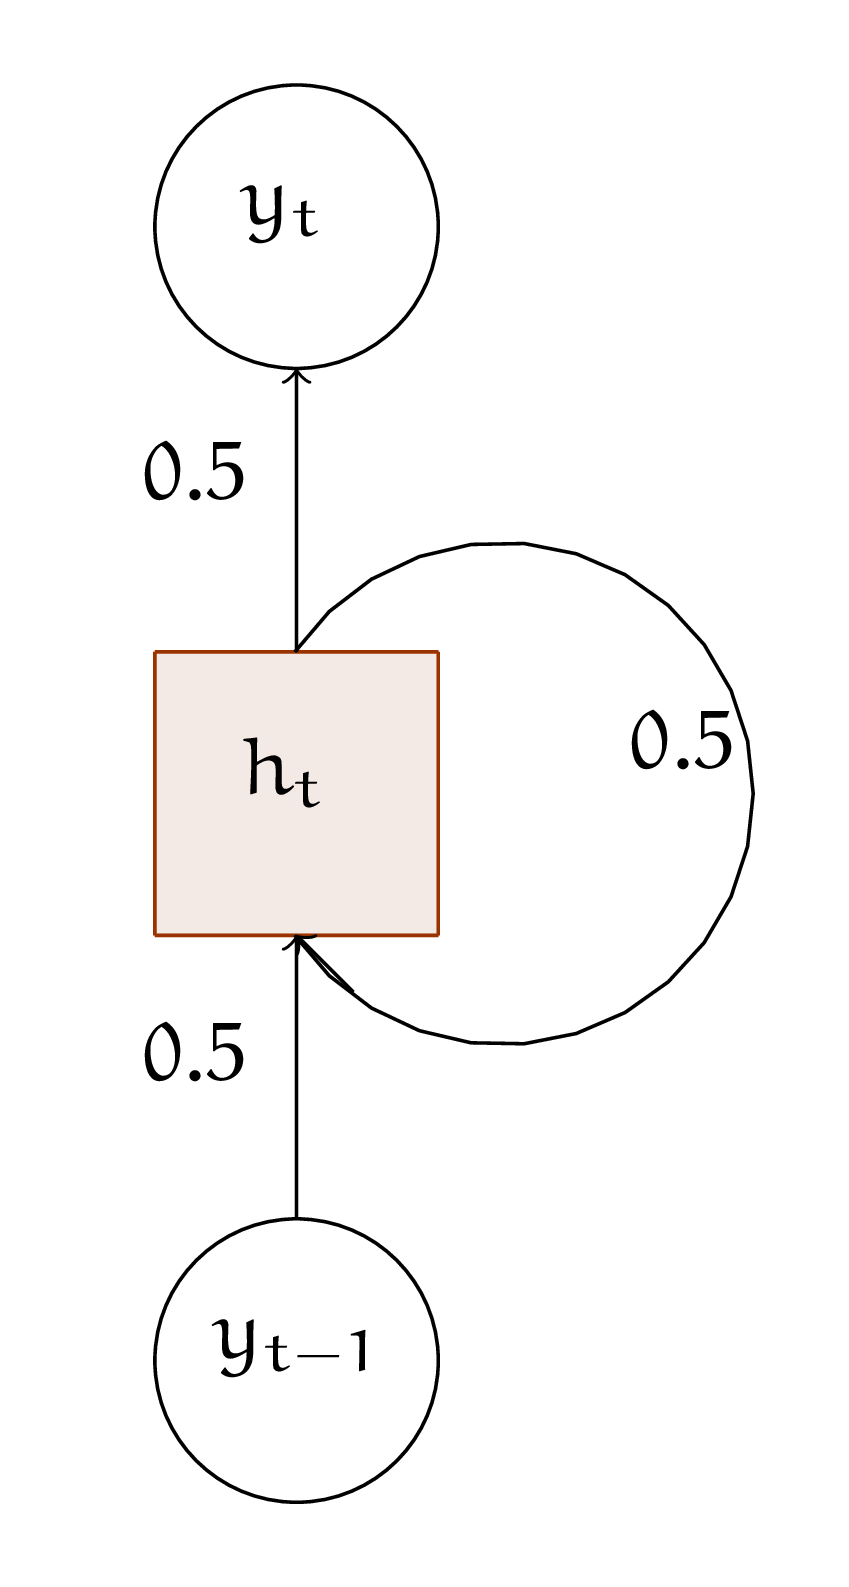



### 4.1. Прямой шаг через ячейку

Рекуррентную сеть можно рассматривать как множество копий одной и той же сети, каждая из которых передаёт информацию следующей копии. Веса для всех копий остаются одинаковыми.



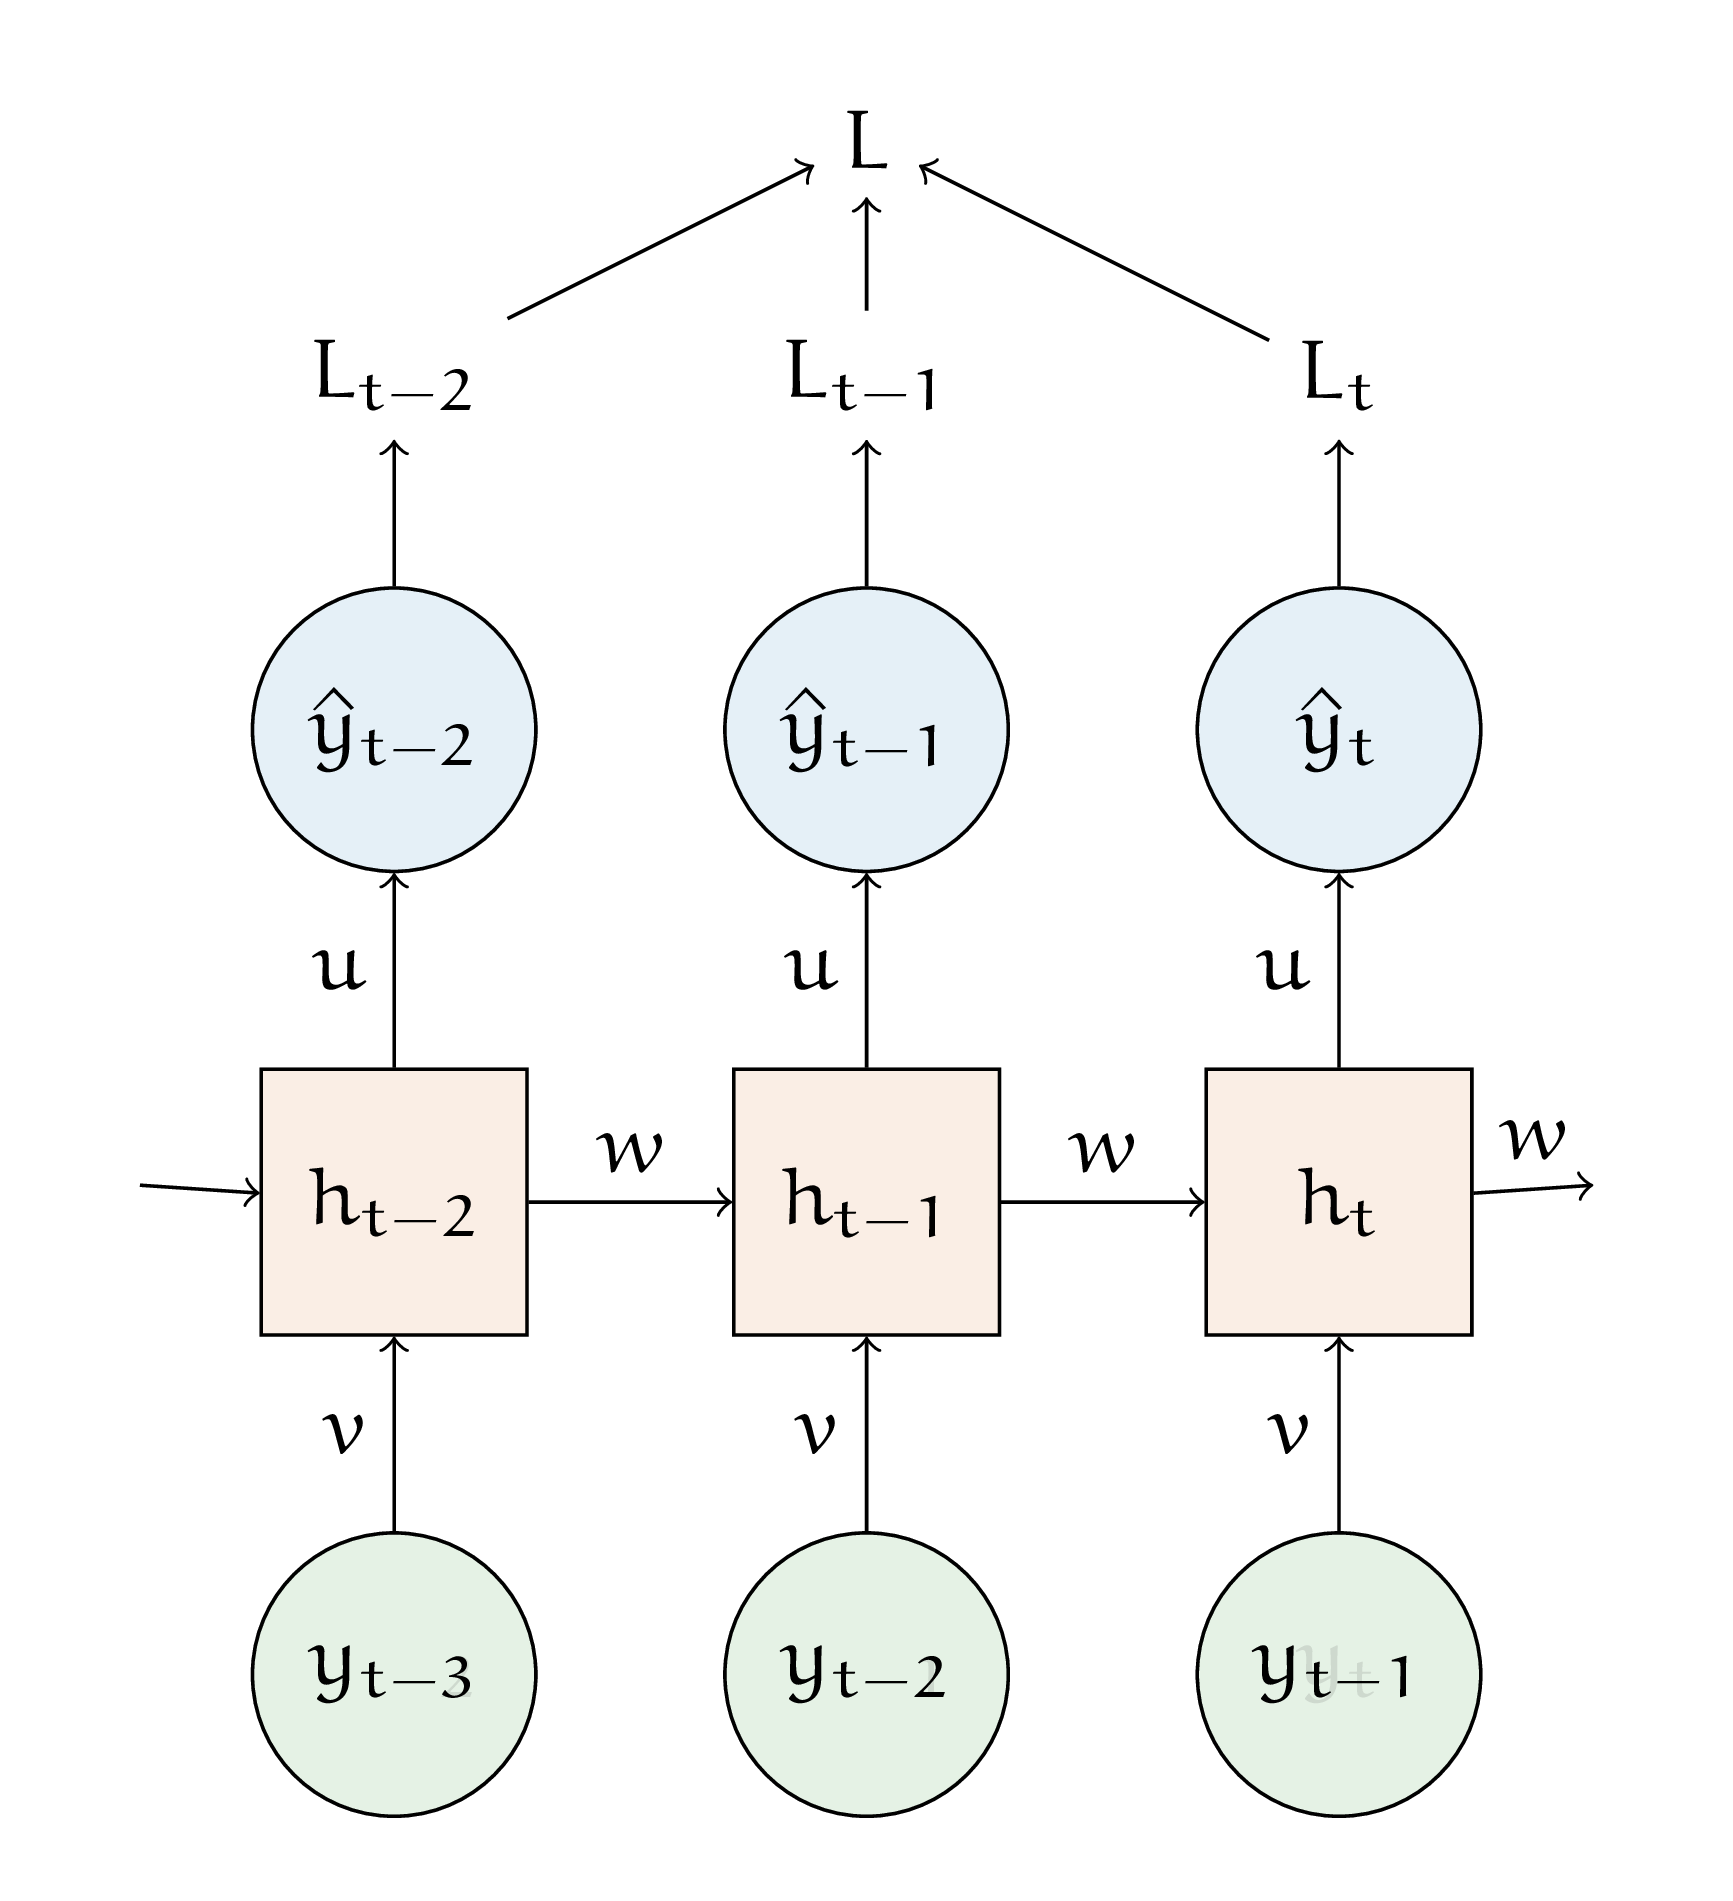

При построении прогнозов движение осуществляется слева направо и сверху вниз. Для выполнения прямого шага необходимо подставить соответствующие значения в формулы пересчета:

$$
\begin{aligned}
    h_t &= \text{ReLU}(0.5 \cdot h_{t-1} + 0.5 \cdot y_{t-1}), \\
    \hat{y}_t &= \text{ReLU}(0.5 \cdot h_t).
\end{aligned}
$$

Теперь можно рассчитать значения для каждого элемента последовательности:

| $t$ | $h_t$ | $\hat{y}_t$ | $y_t$ | $L_t$ |
|---------|-----------|-----------------|-----------|-----------|
| 0       | 0         | -               | 0         | -         |
| 1       | 0         | 0               | 1         | 1         |
| 2       | 0.5       | 0.25            | -1        | 1.5625    |
| 3       | 0.375     | 0.1875          | 2         | 3.285     |

Итоговое значение ошибки нейрона на всей последовательности определяется следующим образом:

$$
L = L_1 + L_2 + L_3 = 1 + 1.5625 + 3.285 = 5.8475.
$$

Это значение необходимо будет уменьшить в ходе обратного распространения ошибки.

### 4.2. Производные функции ошибки по весам $u$, $v$ и $w$

Теперь необходимо выписать производные функции потерь по весам. Начнём с производной по весу $u$:



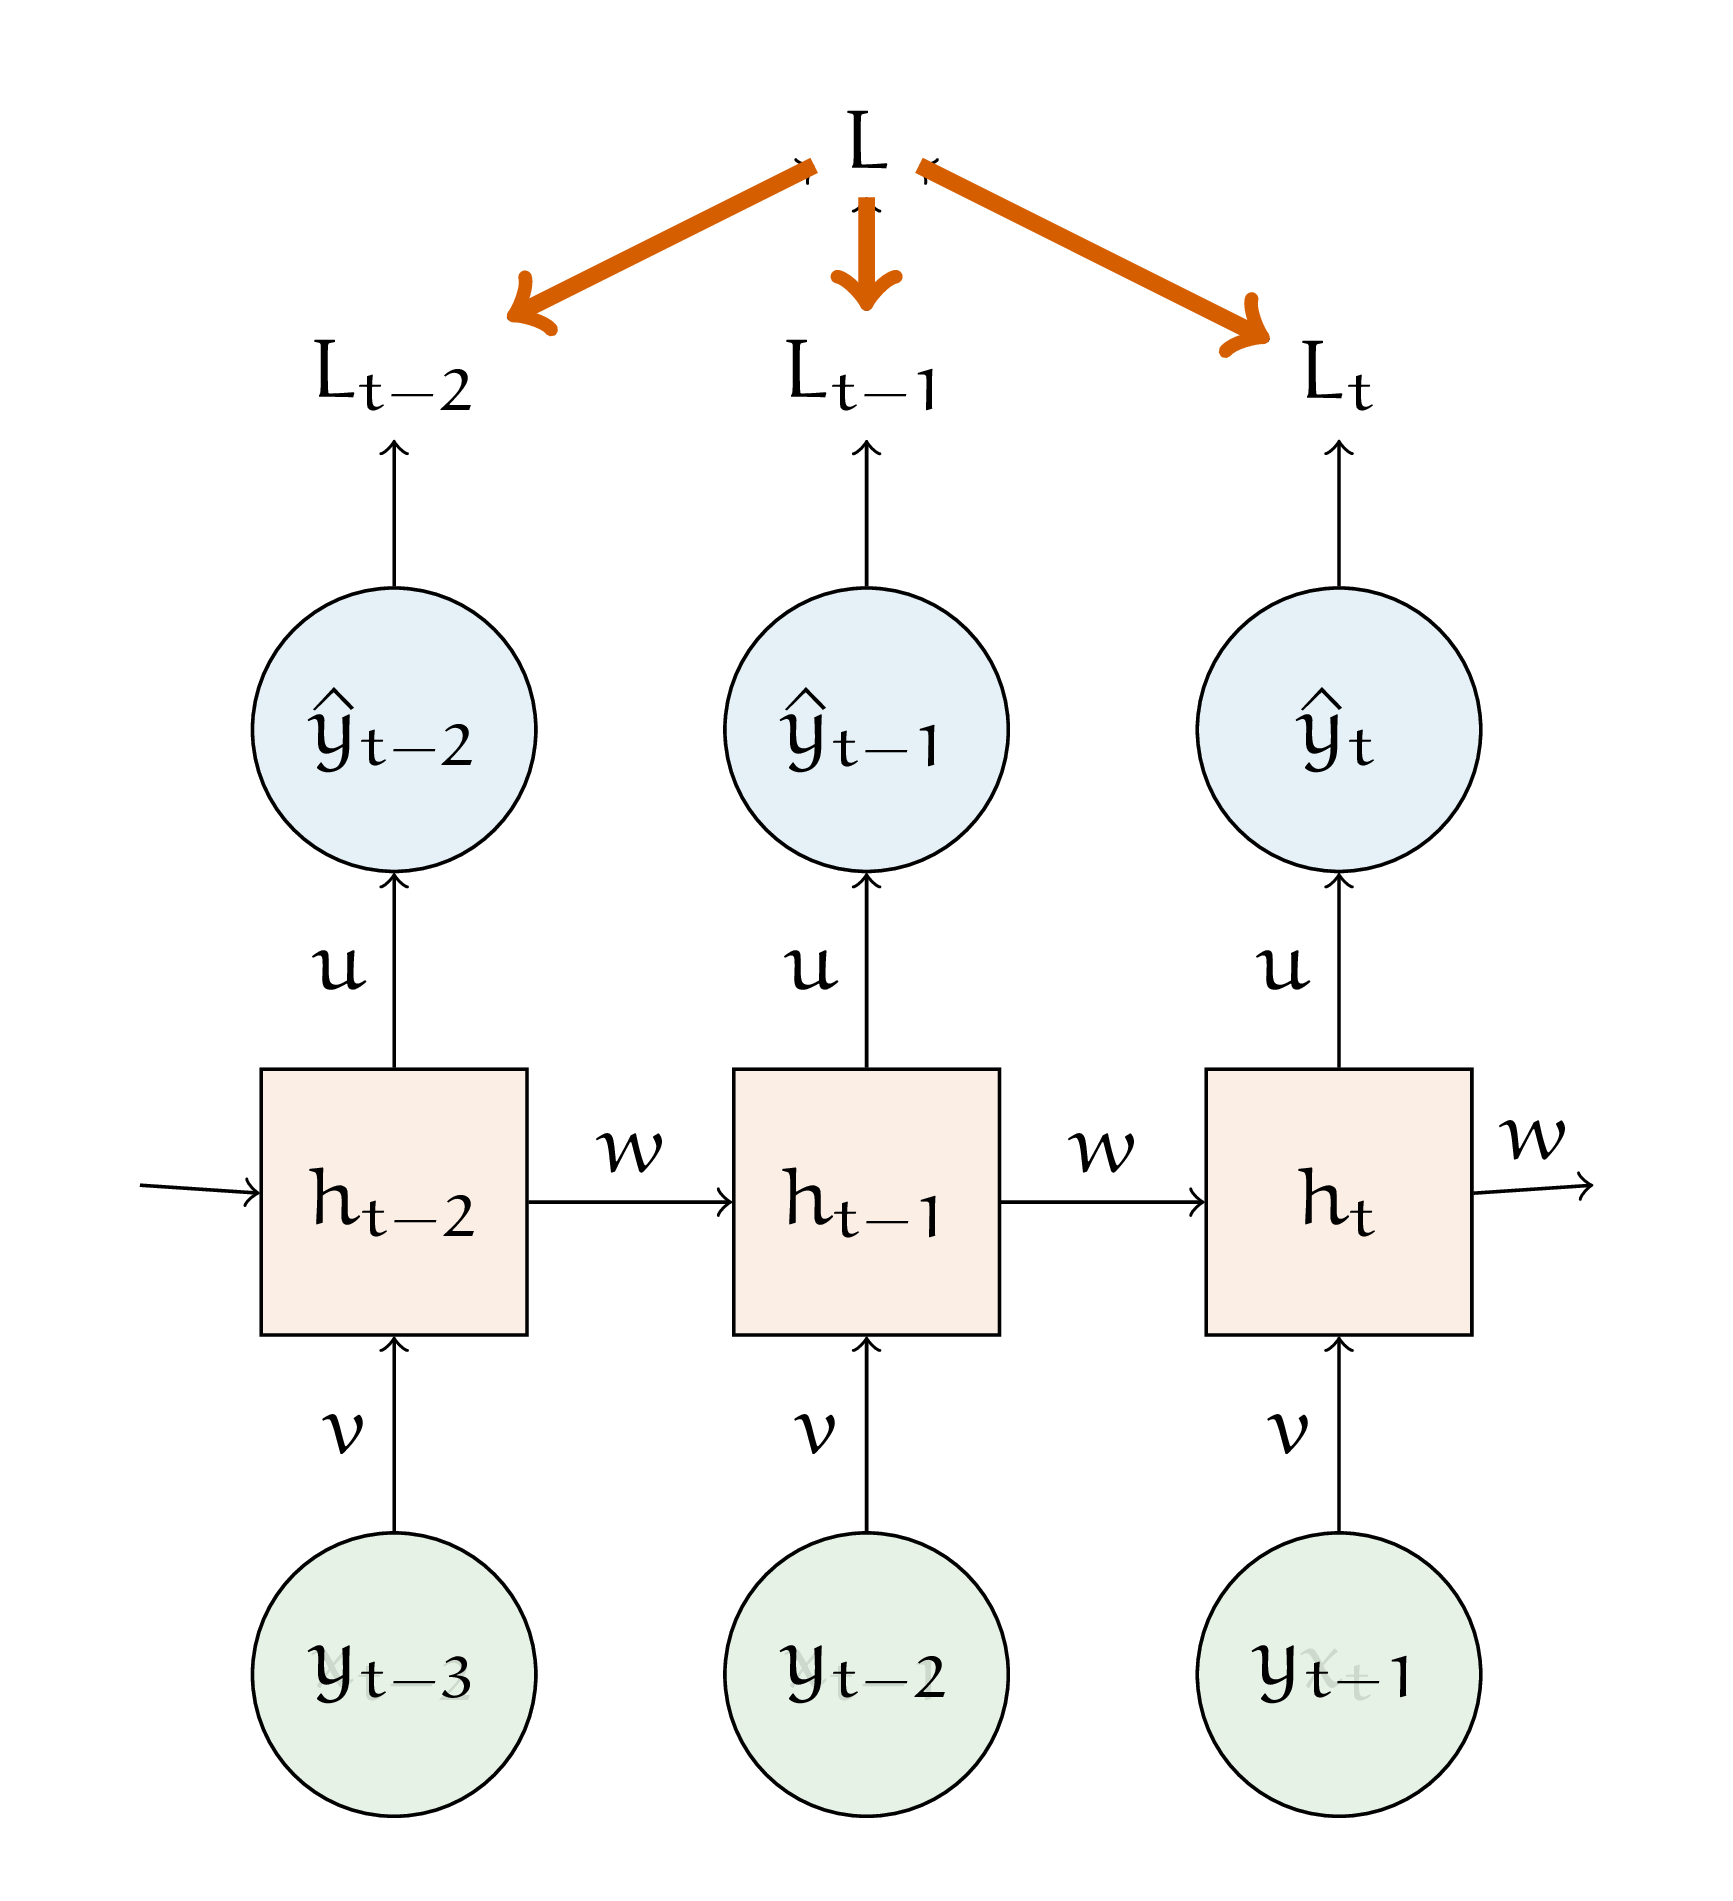


$$
\frac{\partial L}{\partial u} = \sum_{t=0}^{T} \frac{\partial L_t}{\partial u}.
$$

Рассмотрим одно слагаемое:

$$
\frac{\partial L_t}{\partial u} = \frac{\partial L_t}{\partial \hat{y}_t} \cdot \frac{\partial \hat{y}_t}{\partial u}.
$$


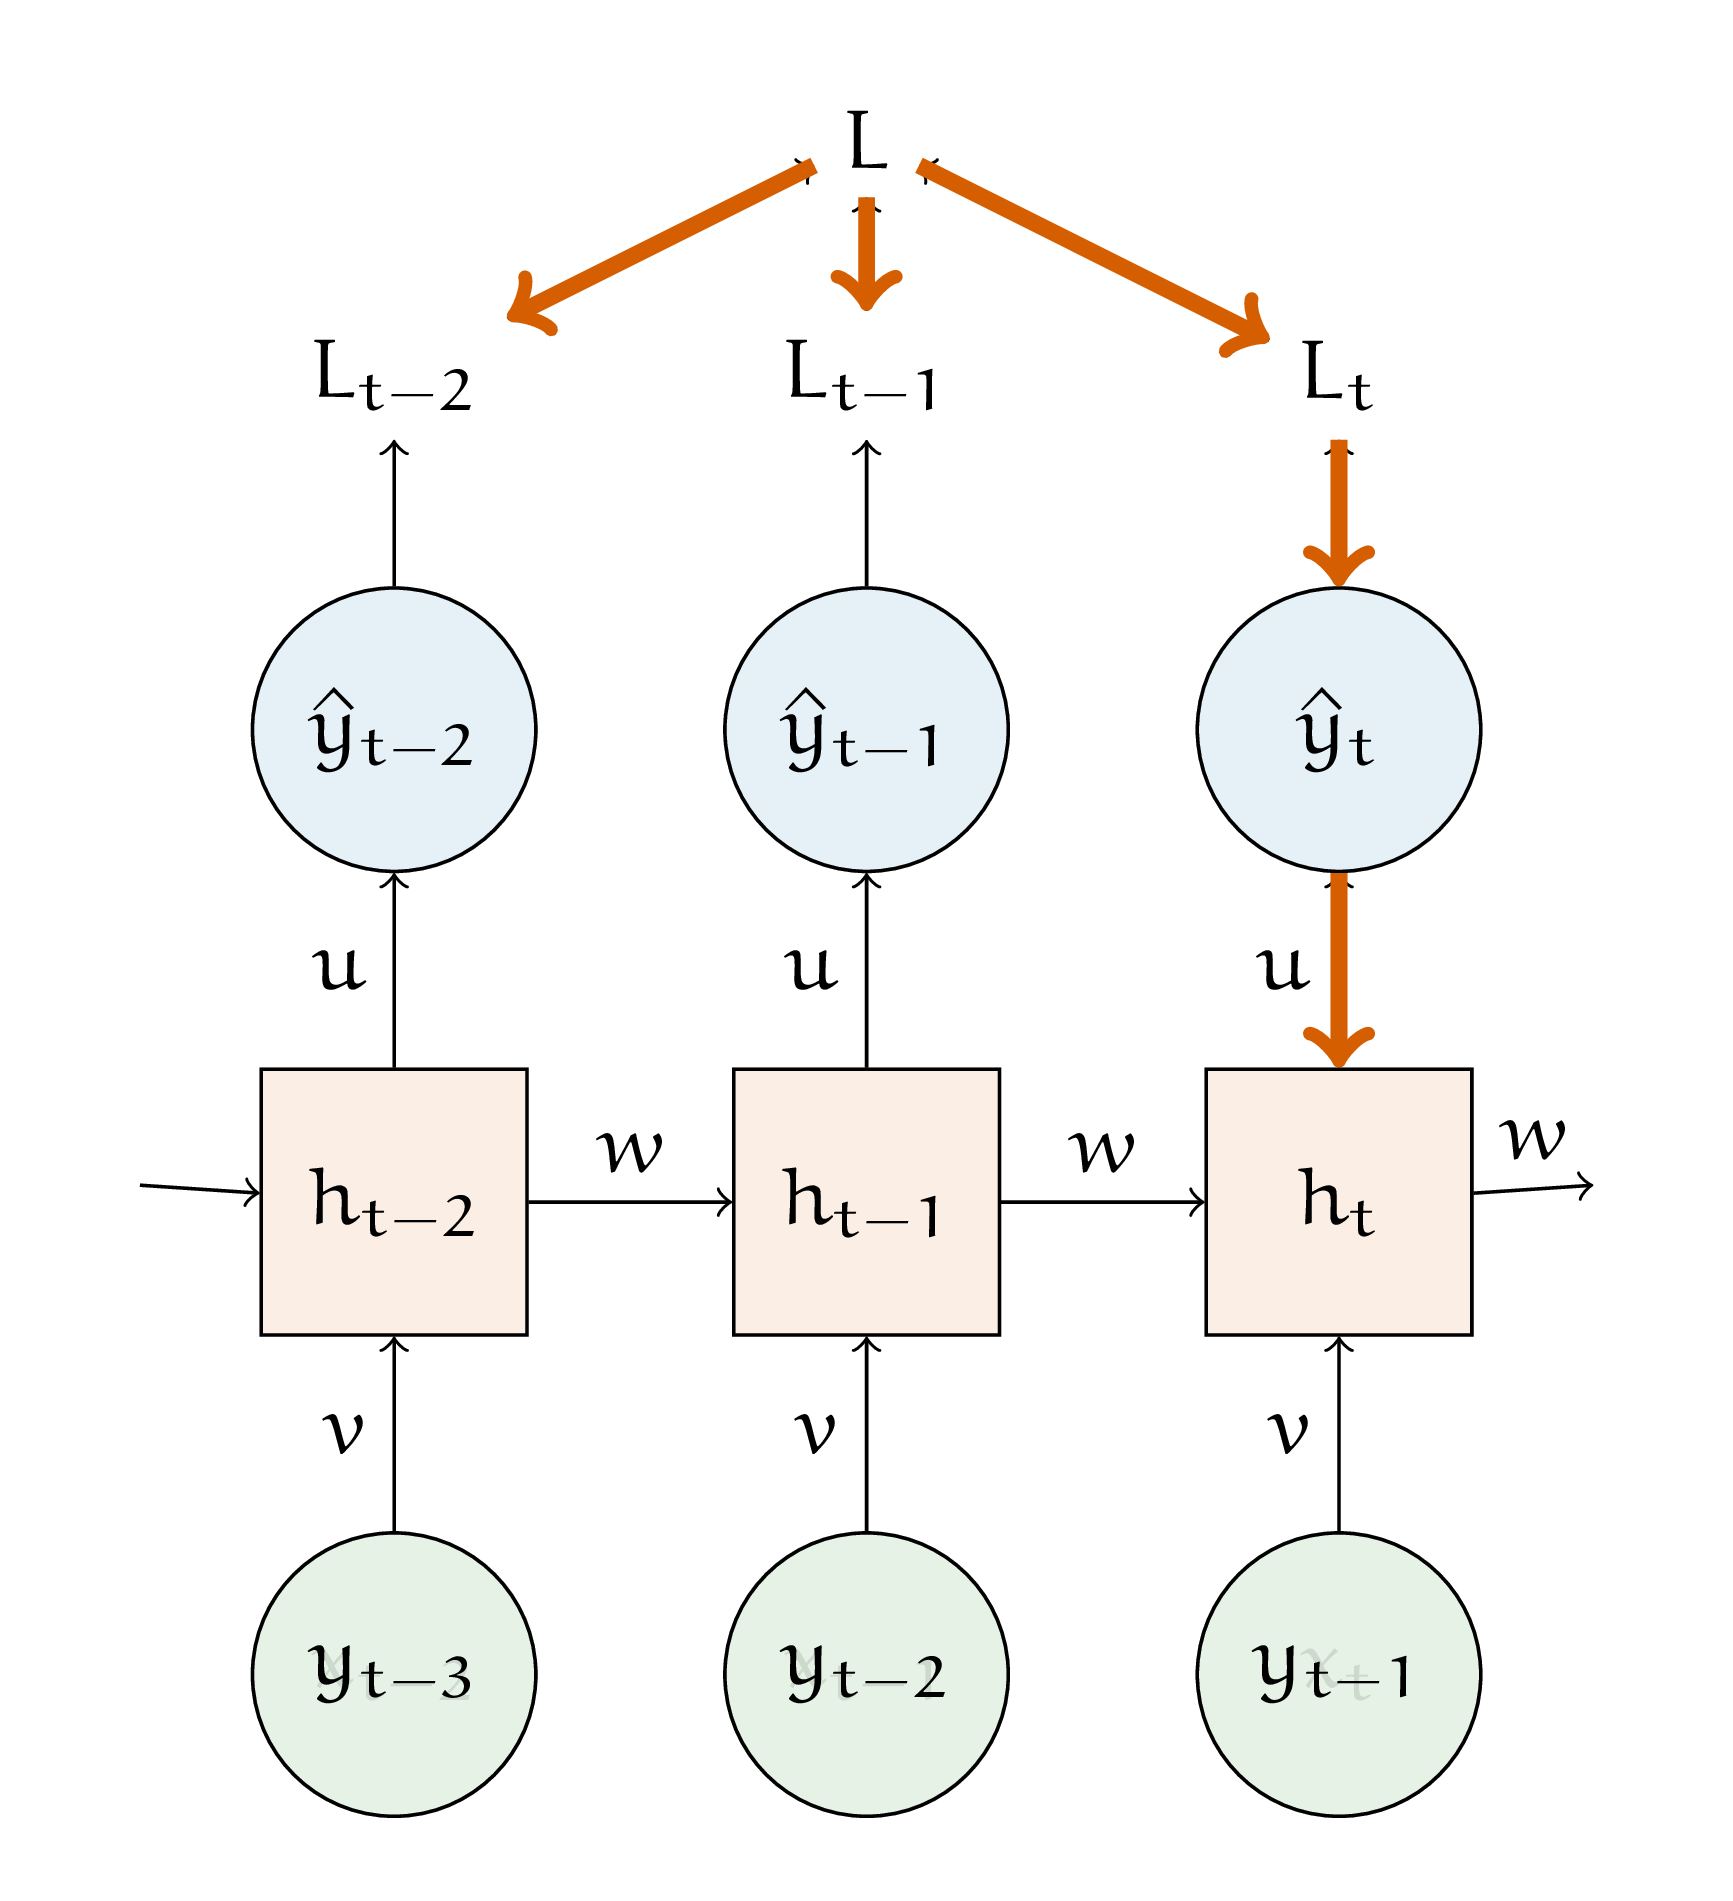


Все эти производные можно вычислить, используя формулы рекуррентного нейрона:

$$
\begin{aligned}
    h_t &= f_h(b_h + w \cdot h_{t-1} + v \cdot y_{t-1}), \\
    \hat{y}_t &= f_y(b_y + u \cdot h_t).
\end{aligned}
$$

Параметр $u$ присутствует в уравнении только в формуле для $\hat{y}_t$. Следовательно, производная упрощается до:

$$
\frac{\partial L_t}{\partial u} = \frac{\partial L_t}{\partial \hat{y}_t} \cdot f_y'(\ldots) \cdot h_t.
$$

Теперь найдем производную по весу $w$:


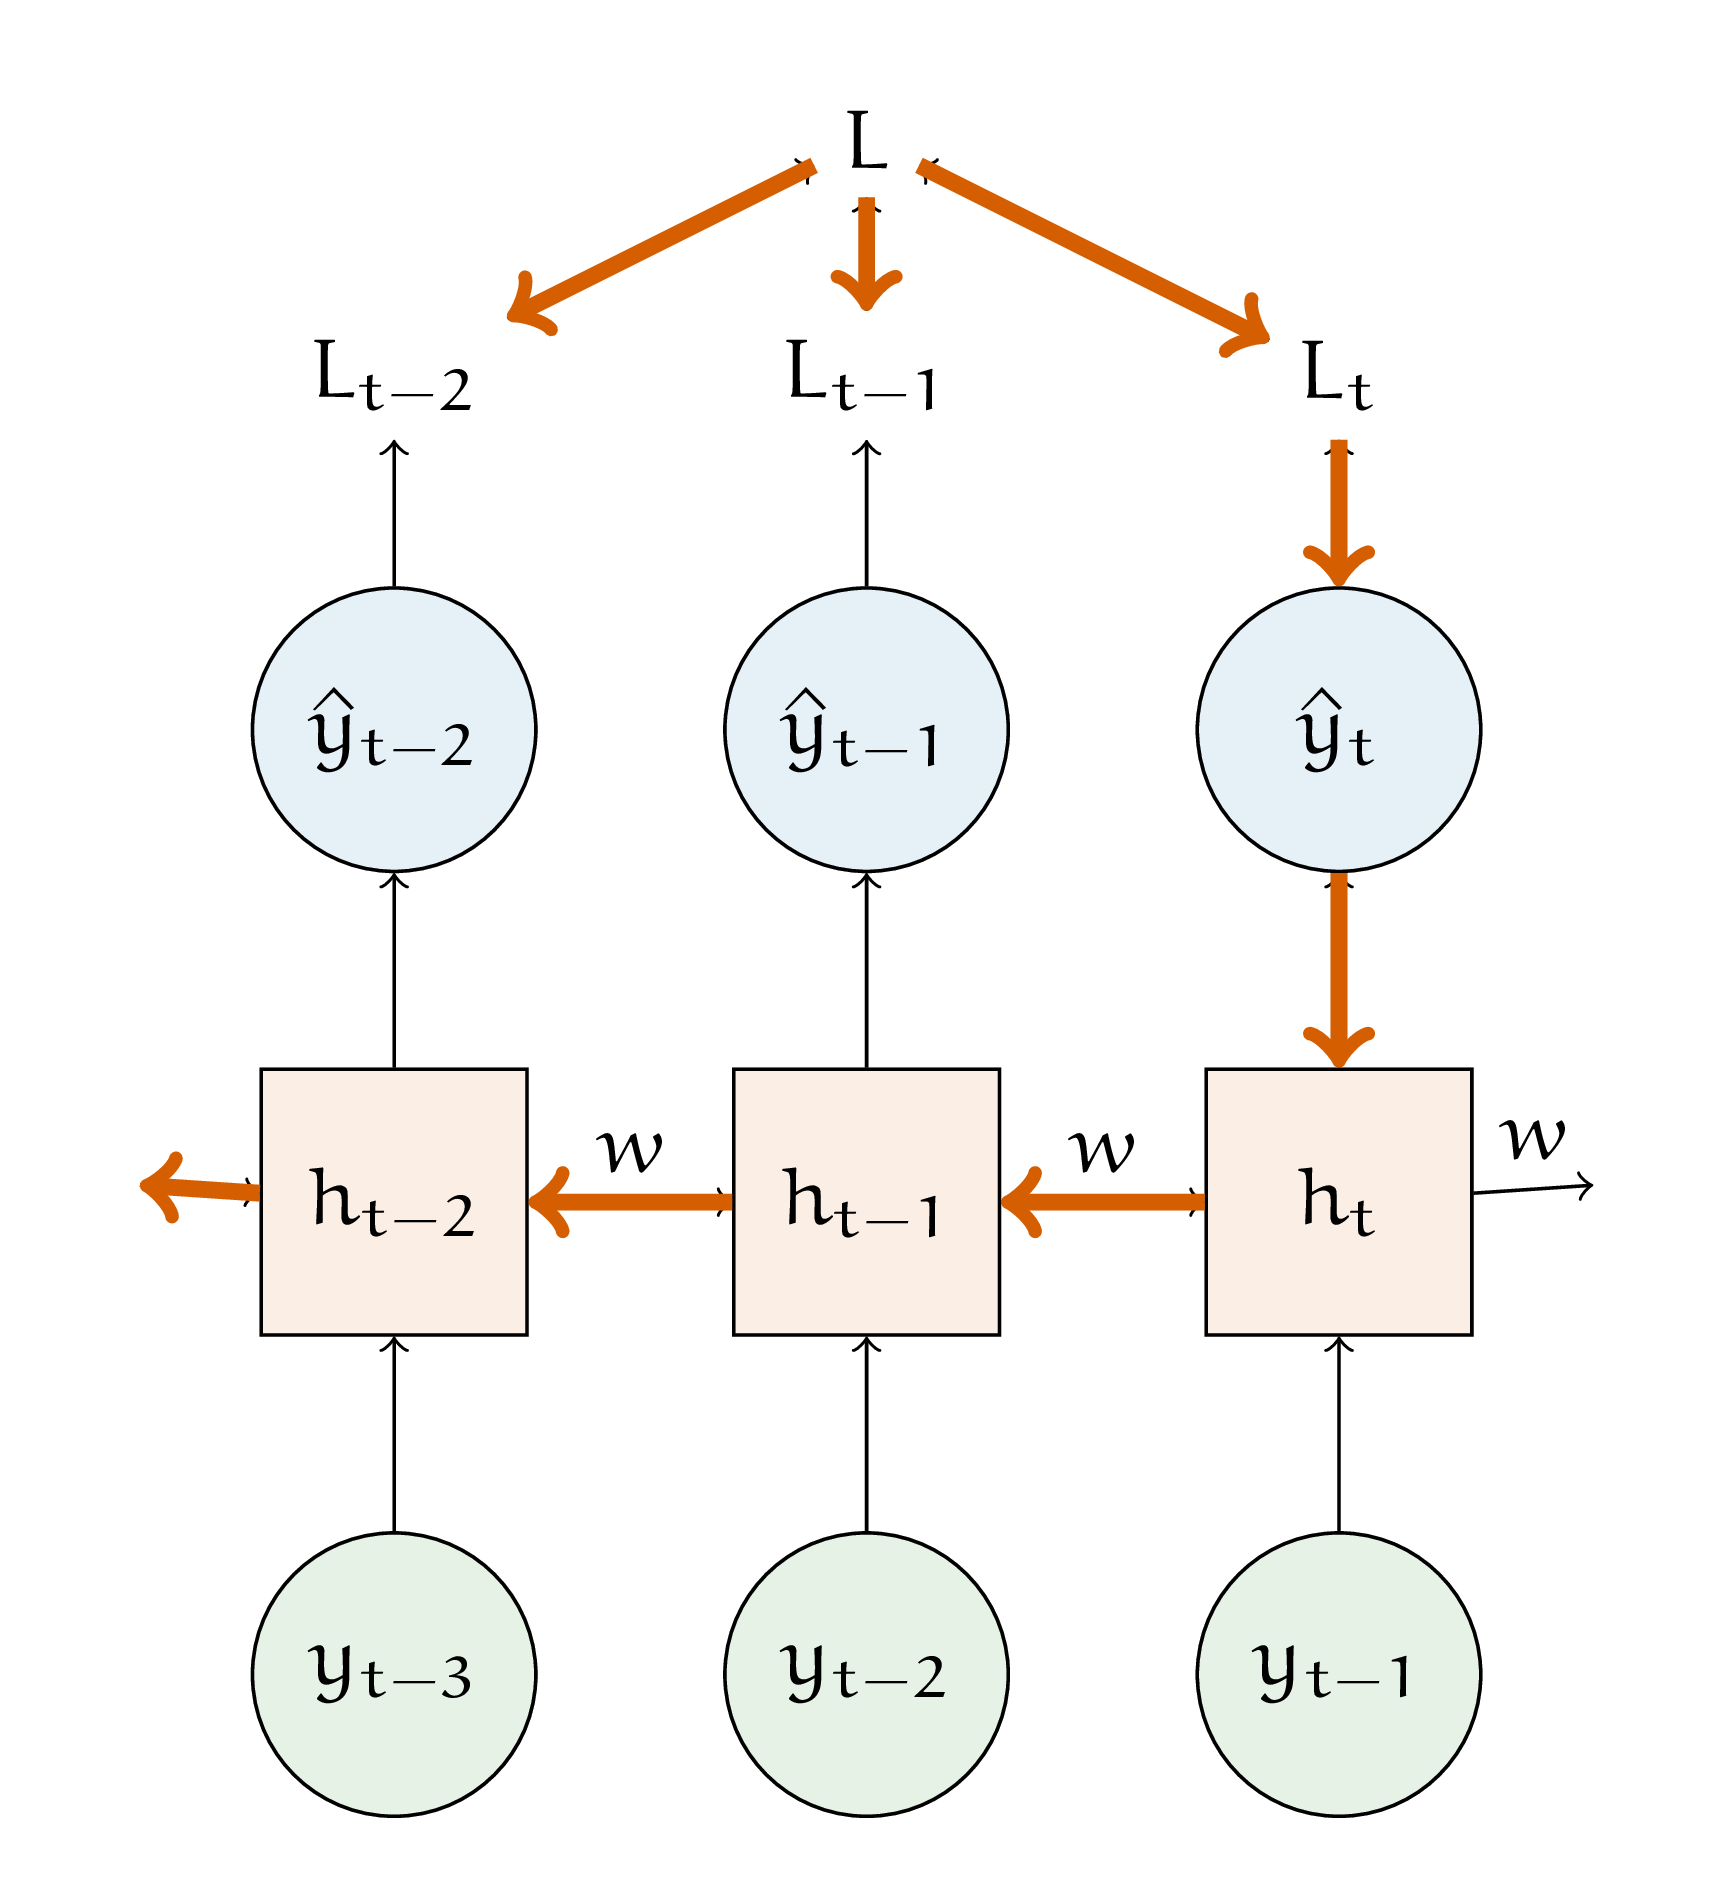


$$
\frac{\partial L_t}{\partial w} = \frac{\partial L_t}{\partial \hat{y}_t} \cdot \frac{\partial \hat{y}_t}{\partial h_t} \cdot \frac{\partial h_t}{\partial w}.
$$

Вес $w$ участвует в каждом пересчете $h_t$, и необходимо учитывать все предыдущие значения:

$$
\frac{\partial h_t}{\partial w} = \frac{\partial h_t}{\partial w} + \frac{\partial h_t}{\partial h_{t-1}} \cdot \frac{\partial h_{t-1}}{\partial w} + \ldots
$$

Итоговая производная имеет вид:

$$
\frac{\partial L_t}{\partial w} = \frac{\partial L_t}{\partial \hat{y}_t} \cdot \frac{\partial \hat{y}_t}{\partial h_t} \cdot \sum_{i=0}^{t} \left( \prod_{j=k+1}^{t} \frac{\partial h_j}{\partial h_{j-1}} \right) \cdot \frac{\partial h_k}{\partial w}.
$$

Наконец, производная по весу $v$:

$$
\frac{\partial L_t}{\partial v} = \frac{\partial L_t}{\partial \hat{y}_t} \cdot \frac{\partial \hat{y}_t}{\partial h_t} \cdot \frac{\partial h_t}{\partial v}.
$$

В этом случае нет необходимости проводить обратное распространение во времени, поскольку производная берется напрямую от $h_t$:

$$
\frac{\partial L_t}{\partial v} = \frac{\partial L_t}{\partial \hat{y}_t} \cdot f_y'(\ldots) \cdot u \cdot f

_h'(\ldots) \cdot y_{t-1}.
$$

### 4.3. Шаг обратного распространения ошибки по весу $u$

Теперь можно выполнить шаг обратного распространения ошибки по весу $u$:

$$
\frac{\partial L}{\partial u} = \frac{\partial L_1}{\partial u} + \frac{\partial L_2}{\partial u} + \frac{\partial L_3}{\partial u},
$$

где

$$
\begin{aligned}
    \frac{\partial L_1}{\partial u} &= \frac{\partial L_1}{\partial \hat{y}} \cdot f'(\ldots) \cdot h_1 = -2 \cdot (1 - 0) \cdot 0 \cdot 0 = 0, \\
    \frac{\partial L_2}{\partial u} &= \frac{\partial L_2}{\partial \hat{y}} \cdot f'(\ldots) \cdot h_2 = -2 \cdot (-1 - 0.25) \cdot 1 \cdot 0.5 = 1.25, \\
    \frac{\partial L_3}{\partial u} &= \frac{\partial L_3}{\partial \hat{y}} \cdot f'(\ldots) \cdot h_3 = -2 \cdot (2 - 0.1875) \cdot 1 \cdot 0.375 = -1.36.
\end{aligned}
$$

Таким образом, итоговое значение производной:

$$
\frac{\partial L}{\partial u} = 0 + 1.25 - 1.36 = -0.11.
$$

Обновление веса $u$ будет выполнено следующим образом:

$$
u_1 = u_0 - \gamma \cdot \frac{\partial L}{\partial u} = 0.5 - 0.1 \cdot (-0.11) = 0.511.
$$

Шаги обратного распространения для весов $w$ и $v$ также могут быть выполнены, однако расчеты будут более сложными из-за наличия временных зависимостей.

### 4.4. Изменения в нейроне при работе с несколькими последовательностями

В случае, если на вход нейрона поступает не одна последовательность, а несколько, все веса преобразуются в матрицы. Формулы остаются теми же, но необходимо учитывать размерность входных данных и соответствующим образом адаптировать все вычисления, чтобы обработать каждую последовательность параллельно.